Let's start our journey with learning the distributions which is the fundamental of statictics

In [24]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Discrete probability distributions

**Bernoulli destribution**

The simplest type of random experiment has only two outcomes, and we can denote them by 0 and 1. A random variable X has the Bernoulli distribution with parameter p (0≤p≤1) if X can take only the values 0 and 1 and the probability of each value is

$P(X=1)=p$

$P(X=0)=1-p$ 


In [35]:
from scipy.stats import bernoulli

#For P(X=1)=0.5
x=1
p = 0.5
print(bernoulli.pmf(k=x, p=p))
print(bernoulli.cdf(k=x, p=p))
print(bernoulli.mean(p=p), bernoulli.std(p=p))

bernoulli.rvs(p=p, size=5, random_state=None) #creates sample size 5 of independent results
#random_state makes it random, you can specify it to get the same results all the time

0.5
1.0
0.5 0.5


array([0, 1, 0, 0, 0], dtype=int64)

Creating the PMF

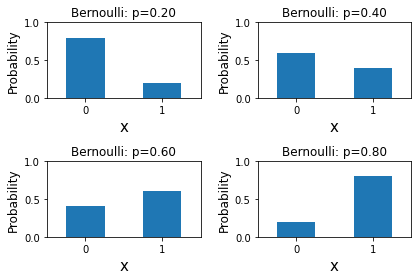

In [42]:
X=[0,1]
p=[0.2,0.4,0.6,0.8]

for index, prob in enumerate(p):
    plt.subplot(2,2,index+1)
    plt.bar(X, bernoulli.pmf(k=X, p=prob), width = 0.5)
    plt.xlim(-0.5, 1.5)
    plt.ylim(0, 1)
    plt.title('Bernoulli: p=%.2f' % (prob), fontsize=12)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(np.arange(0, 2, 1))

plt.tight_layout()
plt.show()

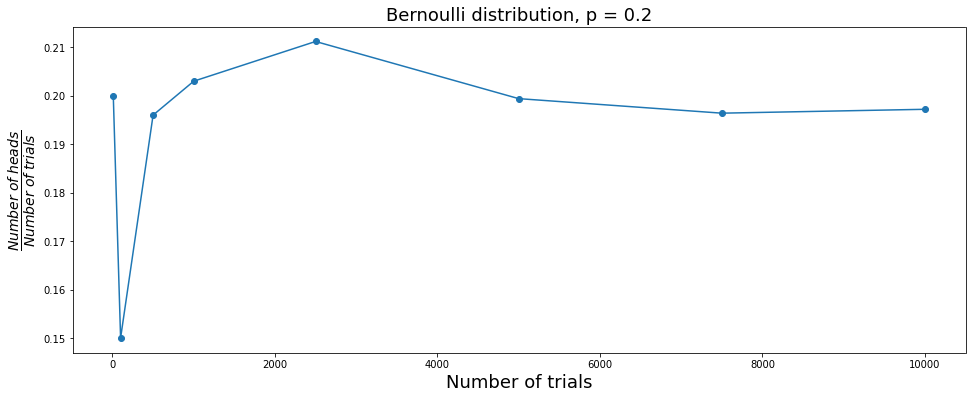

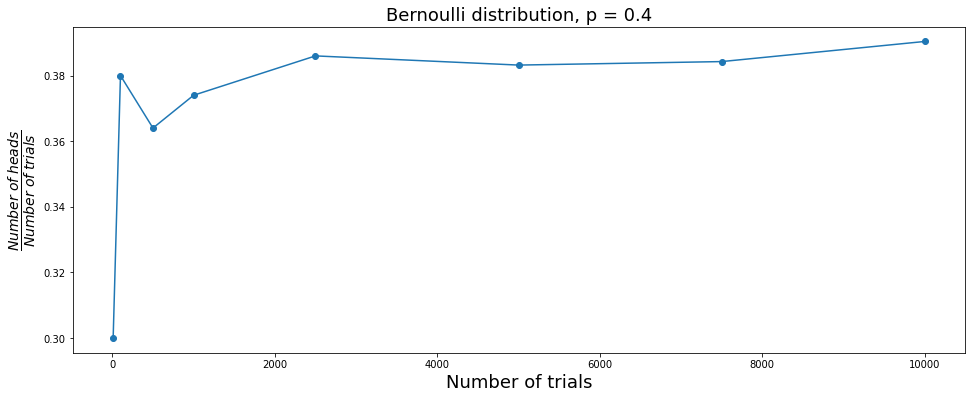

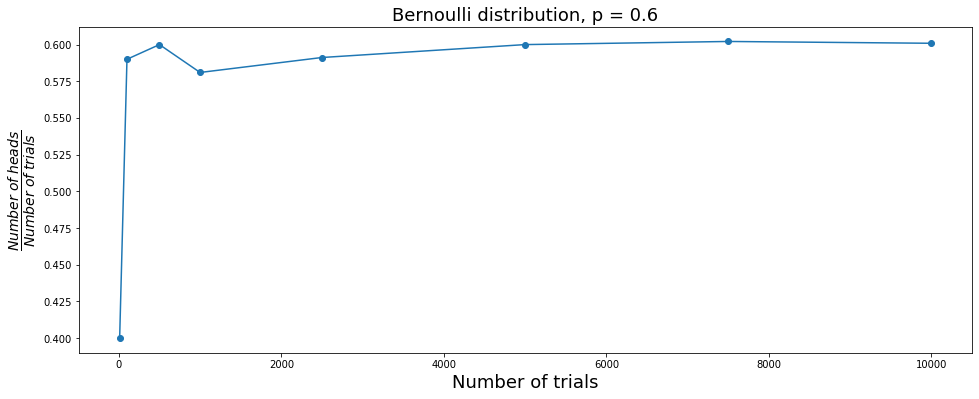

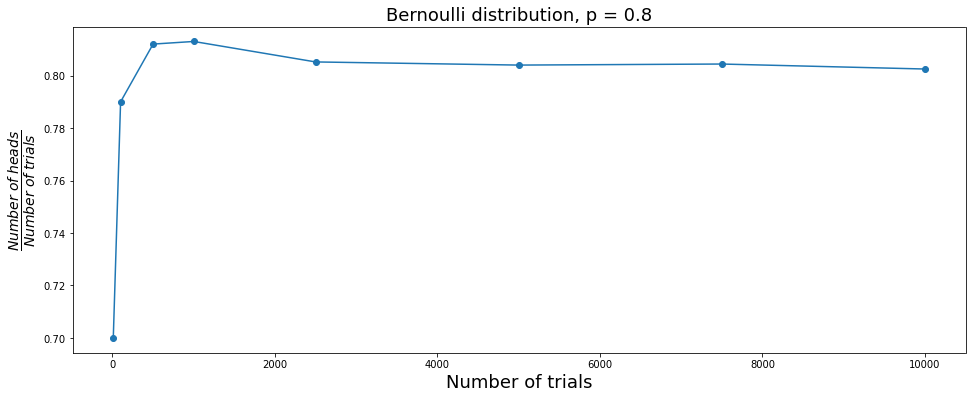

In [55]:
np.random.seed(0)
p=[0.2,0.4,0.6,0.8]
for prob in p:
    sample = bernoulli.rvs(p=prob, size = 10000)
    num_trials = [10, 100, 500, 1000, 2500, 5000, 7500, 10000]
    points = [sample[0:l].mean() for l in num_trials] # we cut the sample in specific points and count the mean

    plt.figure(figsize=(16,6))
    plt.plot(num_trials, points, marker="o")
    plt.xlabel("Number of trials", fontsize = 18)
    plt.ylabel(r"$\frac{Number\; of \; heads}{Number\; of \; trials}$",
            fontsize= 20)
    plt.title("Bernoulli distribution, p = {}".format(prob), fontsize= 18)
    plt.show()

Whatever the probability we choose the ratio of heads to all trials comes to it as for Bernoulli distribution this is the expected value

**Binomial distribution**

Suppose that we have n independent random variables X₁, X₂, ..., Xₙ, and each of them has a Bernoulli distribution with parameter p. If X = X₁+X₂+ ... Xₙ, then X (which is also a discrete random variable) has the binomial distribution with parameters n and p. We can also write it as X ~ Bin(n, p).